<a href="https://colab.research.google.com/github/reshmi-hifi/reshmi-subha/blob/main/aiml_project_sentiment_analysis_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd

In [124]:
 import matplotlib.pyplot as plt
 import seaborn as sns

In [125]:
 import warnings
 warnings.filterwarnings('ignore')

In [126]:
 df=pd.read_csv('/content/barbie_Cleaned.csv')

In [127]:
print(df)

                                                  text rating  people
0    Beautiful film, but so preachyLoveofLegacy21 J...      6     1.0
1    Clever and fun beginning turns into another le...      6     2.0
2    It was depressingcoxaneesa24 July 2023Warning:...      8     3.0
3    A Technicolor Dreamheatherhilgers24 July 2023W...      9     4.0
4     reasons FOR seeing it and 1 reason AGAINST.im...      7     6.0
..                                                 ...    ...     ...
792  Barbie-not goodthongman22 July 2023The only re...      2     NaN
793  Feminism but the rest?iyaseminkose23 July 2023...      5     NaN
794  Great sets, great execution but horrible story...      3     NaN
795  Just meh.apriljosey-2903427 July 2023Warning: ...      2     NaN
796  Not for little kids and wastes your time.ben-3...      1     NaN

[797 rows x 3 columns]


In [128]:
df.shape

(797, 3)

In [129]:
df.columns

Index(['text', 'rating', 'people'], dtype='object')

In [130]:
df.duplicated().sum()

0

In [131]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
792    False
793    False
794    False
795    False
796    False
Length: 797, dtype: bool

In [132]:
df=df.drop_duplicates()

In [133]:
 df.isnull().sum()

text        0
rating      0
people    779
dtype: int64

In [134]:
print(df)

                                                  text rating  people
0    Beautiful film, but so preachyLoveofLegacy21 J...      6     1.0
1    Clever and fun beginning turns into another le...      6     2.0
2    It was depressingcoxaneesa24 July 2023Warning:...      8     3.0
3    A Technicolor Dreamheatherhilgers24 July 2023W...      9     4.0
4     reasons FOR seeing it and 1 reason AGAINST.im...      7     6.0
..                                                 ...    ...     ...
792  Barbie-not goodthongman22 July 2023The only re...      2     NaN
793  Feminism but the rest?iyaseminkose23 July 2023...      5     NaN
794  Great sets, great execution but horrible story...      3     NaN
795  Just meh.apriljosey-2903427 July 2023Warning: ...      2     NaN
796  Not for little kids and wastes your time.ben-3...      1     NaN

[797 rows x 3 columns]


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    797 non-null    object 
 1   rating  797 non-null    object 
 2   people  18 non-null     float64
dtypes: float64(1), object(2)
memory usage: 18.8+ KB


In [136]:
df.describe()

people
count  18.000000
mean    5.000000
std     2.656845
min     1.000000
25%     3.000000
50%     5.000000
75%     7.000000
max     9.000000

In [137]:
df.nunique()

text      797
rating     16
people      9
dtype: int64

In [138]:
df_sorted = df.sort_values(by='text', ascending=False)

In [139]:
 df_sorted.head(10)

text rating  people
44   üè© Possibly a Masterpiece? üííDoNotComeToTheCinem...      1     NaN
219  what to expectkatiejruncorn25 July 2023Warning...      7     NaN
478  what an amazing movieemanoelgustavo20 July 202...      1     NaN
206  weakness to strengthJankiSharma24 July 2023Gre...      1     NaN
760  very good movie, very entertaininggehete-40949...      1     NaN
180  unexpectedly profoundmarcoarbia21 July 2023Tho...      9     NaN
313  this is the movie of humanitynsbsnvp20 July 20...      1     NaN
238  the love letter to girls we all neededv-15334-...      1     NaN
643  surprising and unexpected,NOT a girls movie.as...      8     NaN
272  spoiler free!rachelolivia-4409821 July 2023OMG...      1     NaN

In [140]:
print(df.columns)


Index(['text', 'rating', 'people'], dtype='object')


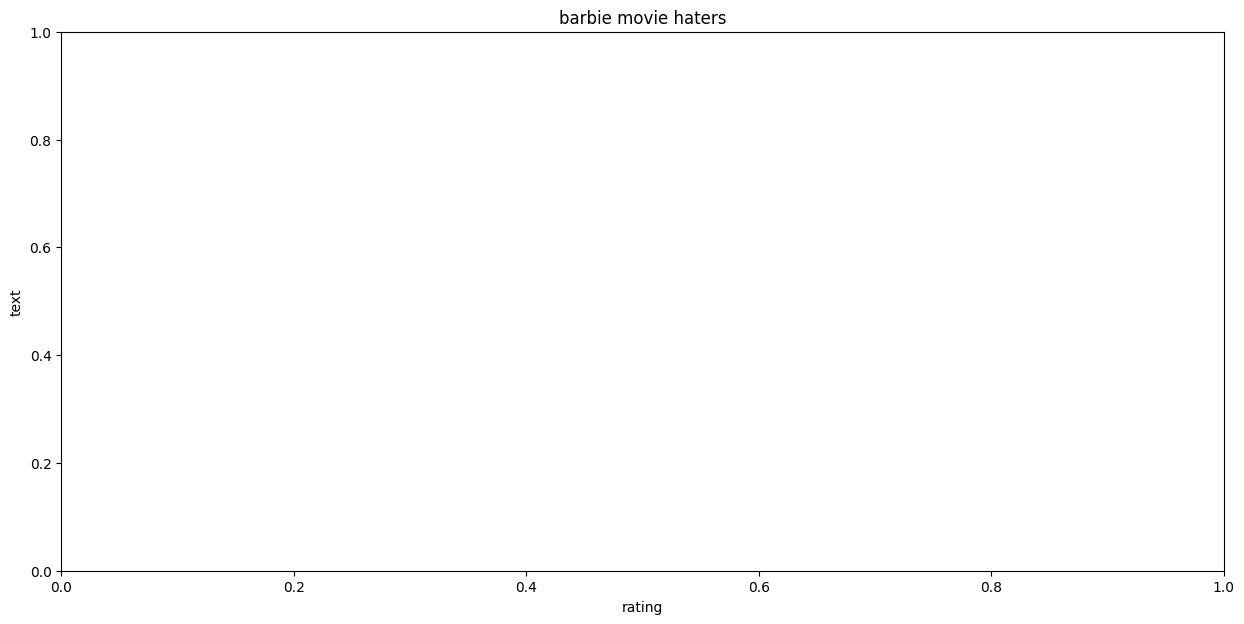

In [141]:
 plt.figure(figsize=[15,7],)
 plt.xlabel('rating')
 plt.ylabel('text')
 plt.title('barbie movie haters')
 plt.show()

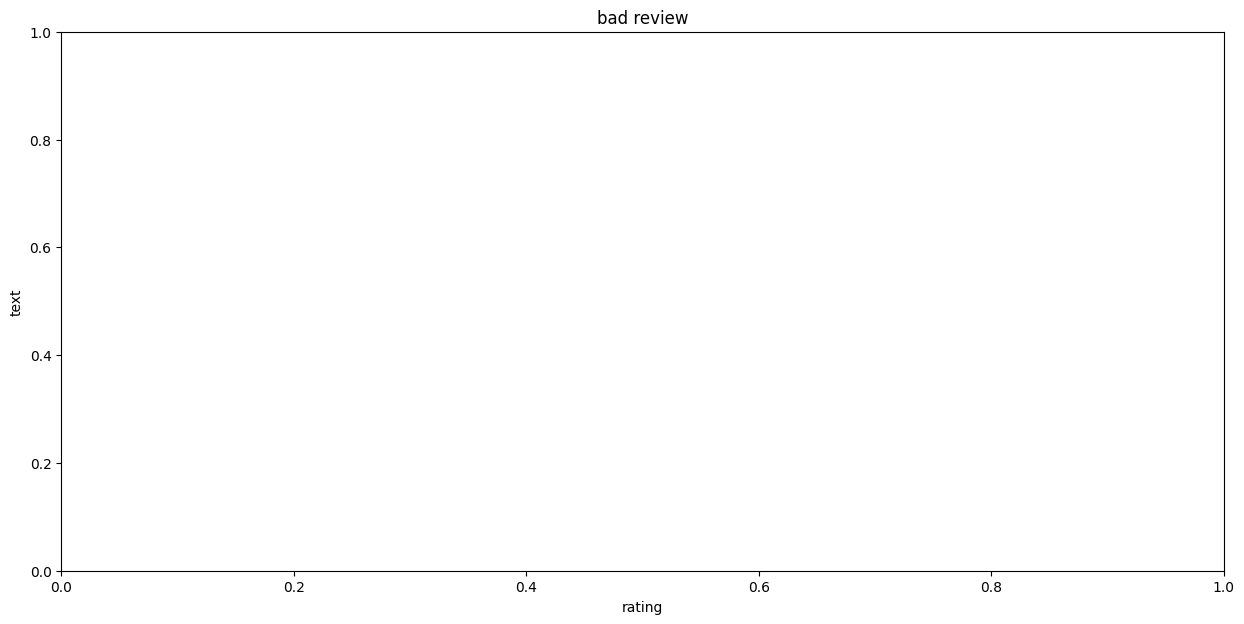

In [165]:
 plt.figure(figsize=[15,7],)
 plt.xlabel('rating')
 plt.ylabel('text')
 plt.title('bad review')
 plt.show()

In [143]:
 import re
 import string
 from tqdm.notebook import tqdm
 from datetime import datetime
 import dateutil.parser

In [144]:
!pip install -q pyspellchecker
!pip install -q spell-checker

ERROR: Cannot install spell-checker==1.1.0, spell-checker==1.2.0, spell-checker==1.2.5, spell-checker==1.3.0, spell-checker==1.4.0, spell-checker==1.5.0, spell-checker==1.6.0 and spell-checker==1.6.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [145]:
 import nltk #natural language tool kit
 from spellchecker import SpellChecker
 from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [146]:
 from wordcloud import WordCloud, ImageColorGenerator
 from nltk.corpus import stopwords
 import random

In [147]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
 languages = stopwords.fileids()
 # Print the number of supported languages
 print("Number of supported languages:", len(languages))
 # Print the list of supported languages
 print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [149]:
from nltk.tokenize import TweetTokenizer

In [150]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [151]:
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)
    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]
    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]
    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)
    return cleaned_tweet

In [152]:
 df['Cleaned_Tweets'] = df['text'].apply(clean_tweet)
 print(df)

                                                  text rating  people  \
0    Beautiful film, but so preachyLoveofLegacy21 J...      6     1.0   
1    Clever and fun beginning turns into another le...      6     2.0   
2    It was depressingcoxaneesa24 July 2023Warning:...      8     3.0   
3    A Technicolor Dreamheatherhilgers24 July 2023W...      9     4.0   
4     reasons FOR seeing it and 1 reason AGAINST.im...      7     6.0   
..                                                 ...    ...     ...   
792  Barbie-not goodthongman22 July 2023The only re...      2     NaN   
793  Feminism but the rest?iyaseminkose23 July 2023...      5     NaN   
794  Great sets, great execution but horrible story...      3     NaN   
795  Just meh.apriljosey-2903427 July 2023Warning: ...      2     NaN   
796  Not for little kids and wastes your time.ben-3...      1     NaN   

                                        Cleaned_Tweets  
0    beautiful film preachyloveoflegacy 21 july 202...  
1    clev

In [153]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [154]:
 def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [155]:
 from nltk.stem import WordNetLemmatizer
 wordnet_lemmatizer = WordNetLemmatizer()

In [156]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [158]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [159]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: lemmatizer(x))

In [160]:
 def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [164]:
 df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [162]:
 !pip install -q langdetect

In [163]:
 from langdetect import detect
 def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None
 df['Language'] = df['Cleaned_Tweets'].apply(detect_language)
 print(df)

                                                  text rating  people  \
0    Beautiful film, but so preachyLoveofLegacy21 J...      6     1.0   
1    Clever and fun beginning turns into another le...      6     2.0   
2    It was depressingcoxaneesa24 July 2023Warning:...      8     3.0   
3    A Technicolor Dreamheatherhilgers24 July 2023W...      9     4.0   
4     reasons FOR seeing it and 1 reason AGAINST.im...      7     6.0   
..                                                 ...    ...     ...   
792  Barbie-not goodthongman22 July 2023The only re...      2     NaN   
793  Feminism but the rest?iyaseminkose23 July 2023...      5     NaN   
794  Great sets, great execution but horrible story...      3     NaN   
795  Just meh.apriljosey-2903427 July 2023Warning: ...      2     NaN   
796  Not for little kids and wastes your time.ben-3...      1     NaN   

                                        Cleaned_Tweets Language  
0    beautiful film preachyloveoflegacy 21 july 202...   